<a href="https://colab.research.google.com/github/s-mostafa-a/covid-chestxray-dataset/blob/master/read_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install "torch==1.4" "torchvision==0.5.0"
! git clone https://github.com/s-mostafa-a/covid-chestxray-dataset

In [1]:
from fastai.vision import *
import pandas as pd

In [4]:
df = pd.read_csv('./covid-chestxray-dataset/metadata.csv')
df["full_path"] = './covid-chestxray-dataset/' + df["folder"] + '/' + df["filename"]
df = df[df['survival'].notna()]
src = (ImageList.from_df(df=df, path='.', cols='full_path')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=('survival')))

tfms = get_transforms(flip_vert=False, max_warp=0.)
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

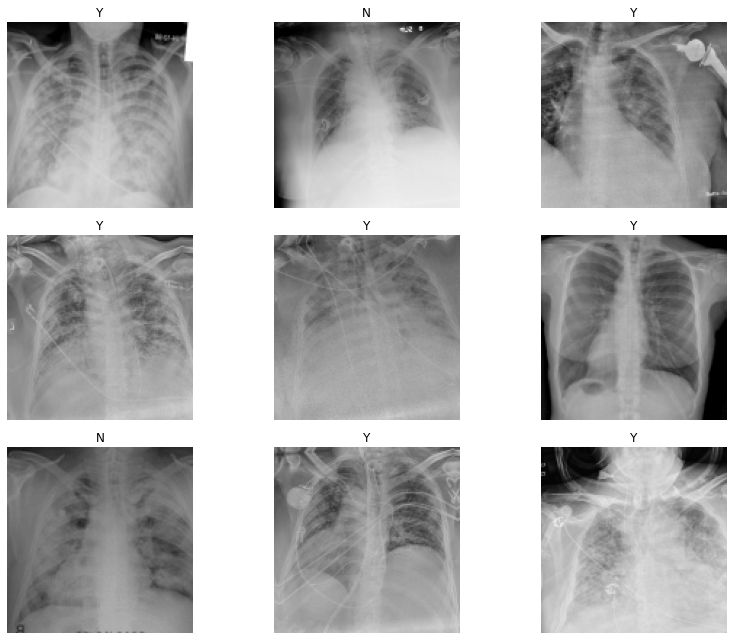

In [5]:
data.show_batch(rows=3, figsize=(12,9))